In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib as plt
import sklearn

In [2]:
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
train_X = train_feat['features']
train_Y = train_feat['label']
valid_X = valid_feat['features']
valid_Y = valid_feat['label']
test_feat_X = np.load("datasets/test/test_feature.npz", allow_pickle=True)['features']

In [22]:
valid_X.shape

(489, 13, 768)

# Performance Metrics

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.pyplot.show()

def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

# MODELS

### Logistic Regression

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = train_X.reshape(train_X.shape[0], -1)
Y = train_Y
X_val = valid_X.reshape(valid_X.shape[0], -1)
Y_val = valid_Y

print(X.shape)
print(Y.shape)
print(X_val.shape)
print(Y_val.shape)

(7080, 9984)
(7080,)
(489, 9984)
(489,)


In [38]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X, Y)

LogisticRegression(max_iter=10000)

In [39]:
y_pred = log_reg.predict(X)
y_val_pred = log_reg.predict(X_val)

In [40]:
train_report = get_classification_report(Y, y_pred)
valid_report = get_classification_report(Y_val, y_val_pred)

In [46]:
print(valid_report)

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       252
     Class 1       0.99      0.98      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489



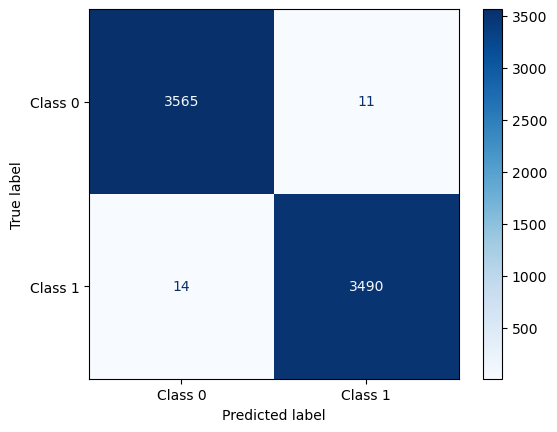

In [45]:
plot_confusion_matrix(Y, y_pred, ['Class 0', 'Class 1'], title='Train Confusion Matrix')

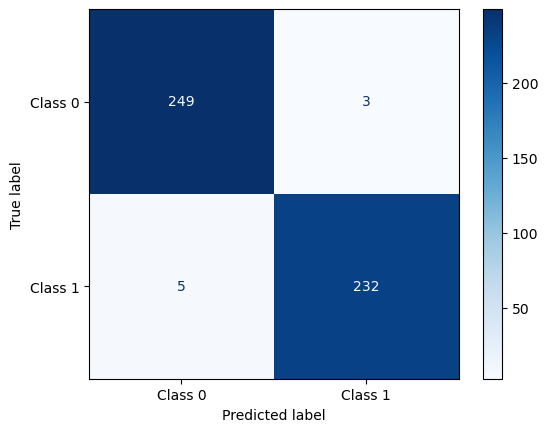

In [47]:
plot_confusion_matrix(Y_val, y_val_pred, ['Class 0', 'Class 1'], title='Validation Confusion Matrix')

### Support Vector Machine

In [4]:
import numpy as np
from sklearn.svm import SVC

X = train_X.reshape(train_X.shape[0], -1)
Y = train_Y
X_val = valid_X.reshape(valid_X.shape[0], -1)
Y_val = valid_Y

In [5]:
svm_linear = SVC(kernel='linear', max_iter=1000)
svm_linear.fit(X, Y)

/home/aujasvit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

In [7]:
y_pred = svm_linear.predict(X)

report = get_classification_report(y_true = Y, y_pred = y_pred)

print(report)

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99      3576
     Class 1       0.99      0.98      0.99      3504

    accuracy                           0.99      7080
   macro avg       0.99      0.99      0.99      7080
weighted avg       0.99      0.99      0.99      7080



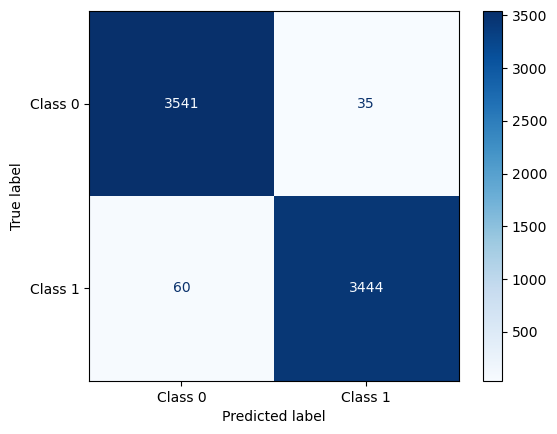

In [8]:
plot_confusion_matrix(Y, y_pred, classes = ['Class 0', 'Class 1'])

In [10]:
y_val_pred = svm_linear.predict(X_val)

report = get_classification_report(Y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       252
     Class 1       0.98      0.98      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489



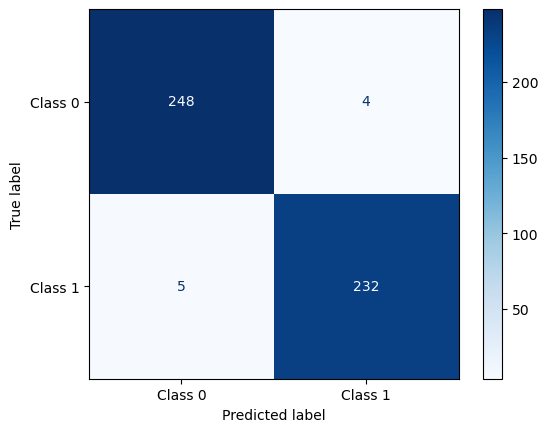

In [11]:
plot_confusion_matrix(Y_val, y_val_pred, classes = ['Class 0', 'Class 1'])

### XGBOOST

In [14]:
import numpy as np
from xgboost import XGBClassifier

X = train_X.reshape(train_X.shape[0], -1)
Y = train_Y
X_val = valid_X.reshape(valid_X.shape[0], -1)
Y_val = valid_Y

In [15]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, Y)

[14:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred = xgb_model.predict(X)

report = get_classification_report(Y, y_pred)
print(report)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3576
     Class 1       1.00      1.00      1.00      3504

    accuracy                           1.00      7080
   macro avg       1.00      1.00      1.00      7080
weighted avg       1.00      1.00      1.00      7080



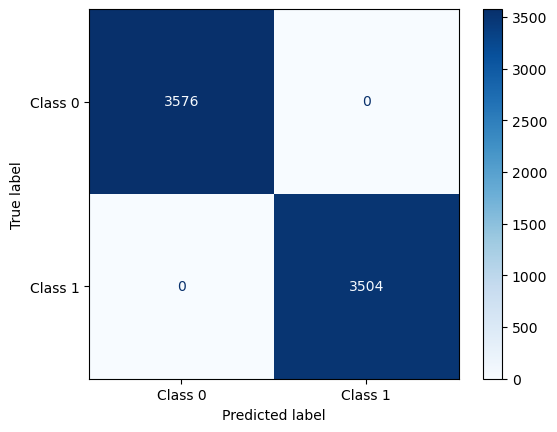

In [17]:
plot_confusion_matrix(Y, y_pred, classes = ['Class 0', 'Class 1'])

In [19]:
y_val_pred = xgb_model.predict(X_val)

report = get_classification_report(Y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       252
     Class 1       0.98      0.98      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489



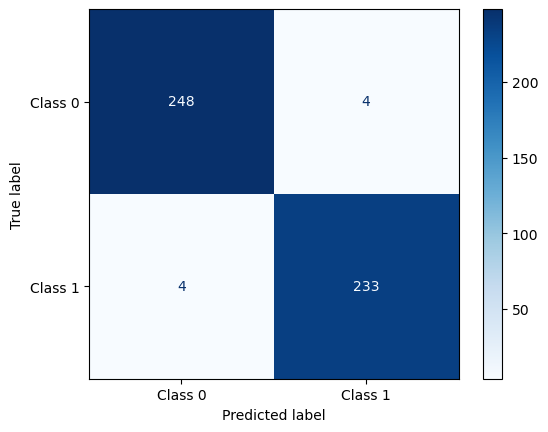

In [20]:
plot_confusion_matrix(Y_val, y_val_pred, classes = ['Class 0', 'Class 1'])

### Multi Layer Perceptron